<div style="display: flex; align-items: center;">
  <div style="flex: 1; max-width: 70%;">
    MSCI is a Python package designed to evaluate the information content of peptide fragmentation spectra. Our objective was to compute an information-content index for all peptides within a given proteome. This would allow us to devise data acquisition and analysis strategies that generate and prioritize the most informative fragment ions for peptide quantification.
  </div>
  <img src="https://github.com/proteomicsunitcrg/MSCI/raw/main/docs/MSCI_logo.png" width="300" style="margin-left: 20px;">
</div>


#Download MSCI package and necessary installations

In [ ]:
!git clone https://github.com/proteomicsunitcrg/MSCI.git
! pip install matchms
# do not restart session if asked (press cancel matchms since probably you already have matchms installed )
%cd MSCI
import sys
sys.path.append('/content/MSCI')


In [ ]:
pip install -i https://test.pypi.org/simple/ MSCI

In [6]:
from MSCI.Preprocessing.Koina import PeptideProcessor
from MSCI.Preprocessing.read_msp_file import read_msp_file
from MSCI.Grouping_MS1.Grouping_mw_irt import process_peptide_combinations
from MSCI.Similarity.spectral_angle_similarity import process_spectra_pairs

# Import


In [ ]:
! pip install matchms

In [3]:
from matchms.importing import load_from_msp
import random
import numpy as np
import pandas as pd


# Genrate predicted dataset

###  Download the list of peptides of interest


In [ ]:
# List of standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to generate a single tryptic peptide
def generate_tryptic_peptide(min_length=8, max_length=20):
    length = random.randint(min_length, max_length - 1)
    peptide = ''.join(random.choices(amino_acids, k=length))
    peptide += random.choice('KR')
    return peptide

# Generate a list of 100 random tryptic peptides
tryptic_peptides = [generate_tryptic_peptide() for _ in range(100)]

last_peptide_length = random.randint(5, 20)
last_peptide = ''.join(random.choices(amino_acids, k=last_peptide_length))
tryptic_peptides[-1] = last_peptide

with open('random_tryptic_peptides.txt', 'w') as f:
    for peptide in tryptic_peptides:
        f.write(f"{peptide}\n")

print("Generated 100 random tryptic peptides and saved to 'random_tryptic_peptides.txt'.")


### Predict with Koina

#### If available your own list of peptides

In [7]:
processor = PeptideProcessor(
    input_file="C:/Users/zelhamraoui/Documents/GitHub/MSCI/random_tryptic_peptides.txt",
    collision_energy=30,
    charge=2,
    model_intensity="Prosit_2020_intensity_HCD",
    model_irt="Prosit_2019_irt"
)

processor.process('random_tryptic_peptides.msp')

# Load dataset


In [8]:
# You can use your own spectra
File= 'random_tryptic_peptides.msp'
spectra = list(load_from_msp(File))

2024-08-20 15:57:58,509:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,511:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,513:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,515:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,519:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,522:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,525:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,528:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,530:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,532:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-08-20 15:57:58,535:WARNING:matchms:add_precursor_mz:No precursor_mz found i

# Group within MS1 tolerance

In [9]:
mz_tolerance = 5
irt_tolerance = 5


mz_irt_df = read_msp_file(File)
Groups_df = process_peptide_combinations(mz_irt_df, mz_tolerance, irt_tolerance, use_ppm=False)

Groups_df

Results DataFrame Columns: Index(['index1', 'index2', 'peptide 1', 'peptide 2', 'm/z  1', 'm/z 2',
       'iRT 1', 'iRT 2'],
      dtype='object')


,index1,index2,peptide 1,peptide 2,m/z 1,m/z 2,iRT 1,iRT 2
0,31,85,AQEYSRAGPLTVHK/2,DCMWYHEERKR/2,778.912622,776.842827,6.998272,7.659088
1,33,34,GLQCFKHQMEVRQNNRHTCK/2,GLQFCKHQMEVRQNNRHTCK/2,1229.094080,1229.094080,-4.401394,-5.657276
2,22,87,IQINPNDYAWVSGQVYKWVK/2,WIWLTVKCWEPNLQDVRAR/2,1204.623510,1207.133522,125.768631,128.114777
3,37,73,VMMRNPDVDHLVGNK/2,TFKTKLTSTLIHDGR/2,862.932173,859.483411,41.366417,37.318249
4,6,46,RCFFWVLESLFNRICKK/2,CVCDNILPAWMLPEEIWR/2,1095.079172,1094.523038,157.620422,160.780777
5,95,98,QRCEQHSYHMMSGQMQYWEK/2,QQCERHSYHMMSGQMQYWEK/2,1294.040322,1294.040322,42.806053,41.172798


# Calculate similarity within fragment tolerance


In [10]:
Groups_df.columns = Groups_df.columns.str.strip()
index_array = Groups_df[['index1','index2']].values.astype(int)
result = process_spectra_pairs(index_array, spectra,  mz_irt_df, tolerance =0, ppm=10)
result

0.0
0.7366079240570362
0.0
0.0
0.0
0.7623991292727825


,index1,index2,peptide 1,peptide 2,m/z 1,m/z 2,iRT 1,iRT 2,similarity_score
0,31,85,AQEYSRAGPLTVHK/2,DCMWYHEERKR/2,778.912622,776.842827,6.998272,7.659088,0.000000
1,33,34,GLQCFKHQMEVRQNNRHTCK/2,GLQFCKHQMEVRQNNRHTCK/2,1229.094080,1229.094080,-4.401394,-5.657276,0.736608
2,22,87,IQINPNDYAWVSGQVYKWVK/2,WIWLTVKCWEPNLQDVRAR/2,1204.623510,1207.133522,125.768631,128.114777,0.000000
3,37,73,VMMRNPDVDHLVGNK/2,TFKTKLTSTLIHDGR/2,862.932173,859.483411,41.366417,37.318249,0.000000
4,6,46,RCFFWVLESLFNRICKK/2,CVCDNILPAWMLPEEIWR/2,1095.079172,1094.523038,157.620422,160.780777,0.000000
5,95,98,QRCEQHSYHMMSGQMQYWEK/2,QQCERHSYHMMSGQMQYWEK/2,1294.040322,1294.040322,42.806053,41.172798,0.762399


# Plot results

### Plot spectra of interest using matchms

Name    LSNGRGKHIEPKFDK/2
MW             863.473377
iRT             -12.67551
Name: 14, dtype: object
Name    AQEYSRAGPLTVHK/2
MW            778.912622
iRT             6.998272
Name: 31, dtype: object


(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

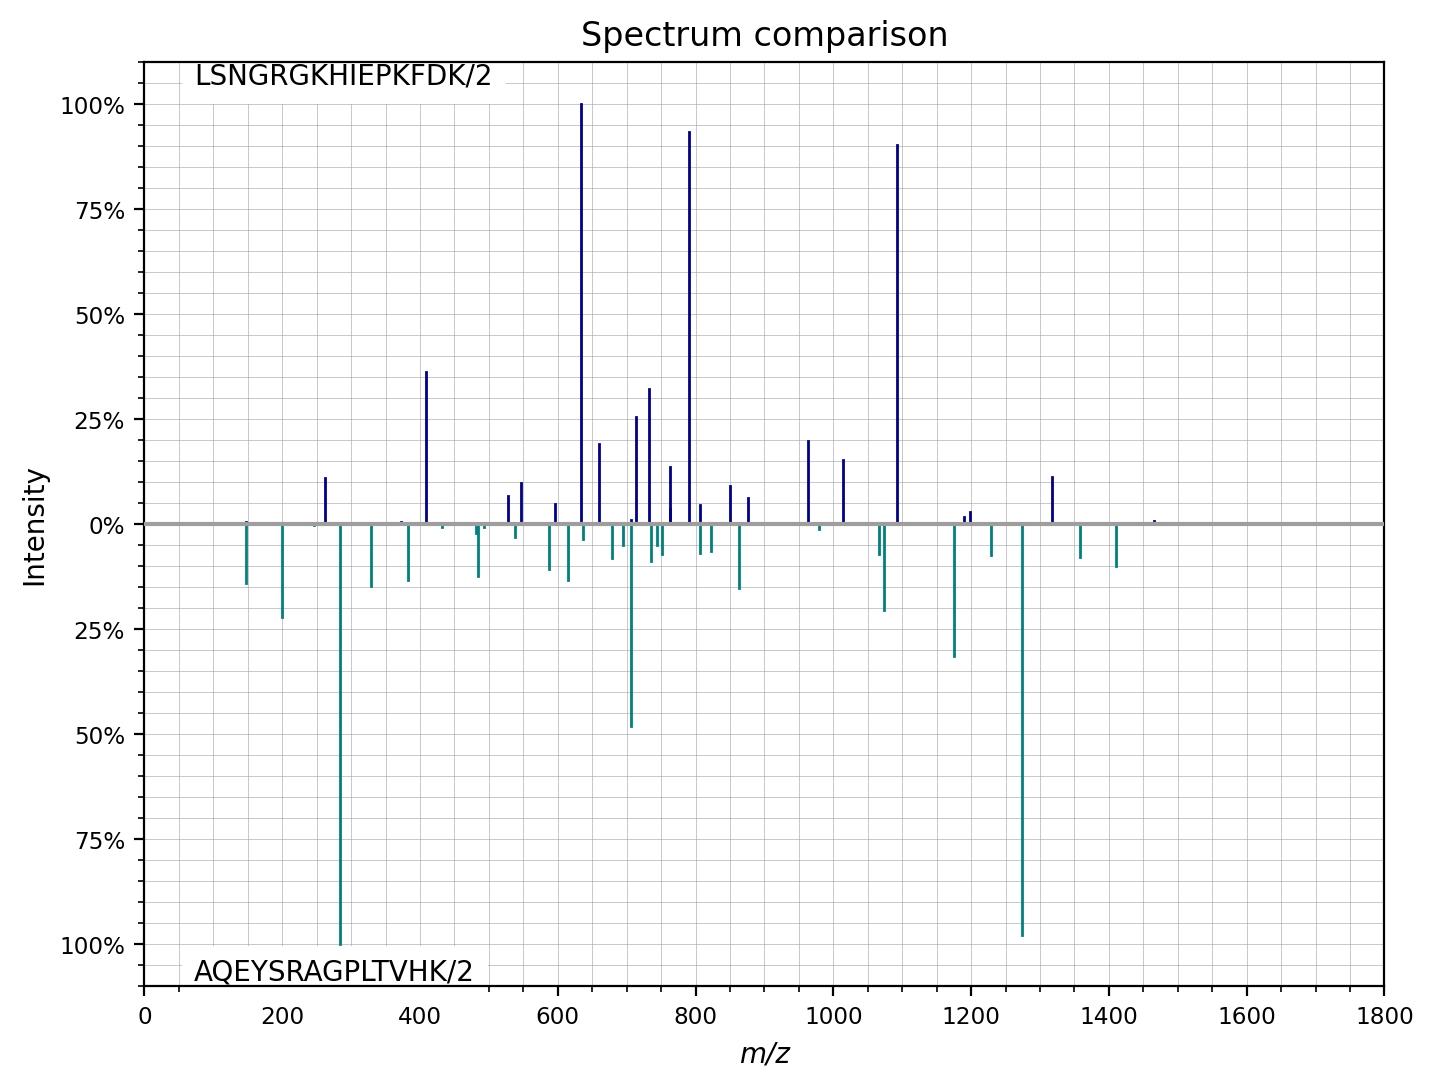

In [11]:
print(mz_irt_df.iloc[14])
print(mz_irt_df.iloc[31])
spectra[14].plot_against(spectra[31])